# Capstone 4 - Liver Disease Early Detection
---







<font color = "blue">My Role:<br>

<font color = "blue"> As a Junior AI Engineer employed at a Healthcare Company, I am currently engaged in a project assigned by the Lab Department of the Ministry of Health (MOH). Our objective is to develop a cost-effective (aka cheap) machine learning algorithm known as "Liver Disease Early Detection Program".

 ---

<font color = 'blue'> The dataset (from UCI Machine Learning) comprises 416 records of patients with liver disease and 167 records of patients without liver disease. <br> 
    It was collected from the northeastern region of Andhra Pradesh, India. <br>
    The "Liver Disease" column serves as a class label to categorize the patients into two groups: those with liver disease and those without. <br>
    Among the patients, there are 441 males and 142 females. <br>
    If a patient's age surpasses 89, their age is recorded as "90."

<font color = "blue"> 01. **[Age]**    Age of the patient <br>
<font color = "blue"> 02. **[Gender]** Gender of the patient <br>
<font color = "blue"> 03. **[TB]**     Total Bilirubin <br>
<font color = "blue"> 04. **[DB]**	   Direct Bilirubin <br>
<font color = "blue"> 05. **[Alkphos]** Alkaline Phosphotase<br>
<font color = "blue"> 06. **[Sgpt]** Alamine Aminotransferase<br>
<font color = "blue"> 07. **[Sgot]** Aspartate Aminotransferase<br>
<font color = "blue"> 08. **[TP]** Total Protiens<br>
<font color = "blue"> 09. **[ALB]** Albumin<br>
<font color = "blue"> 10. **[A/G Ratio]** Albumin and Globulin Ratio<br>
<font color = "blue"> 11. **[Liver Disease]** Selector field used to split the data into two sets (labeled by the experts)

---

<font color = 'blue'> Let's open the csv file and examine the data.

<div>
   <img src="csv_screenshot.JPG" width="700">
</div>

# 1. Libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

import warnings
warnings.filterwarnings('ignore')

# 2. Explore the dataset

<font color = 'blue'> Load the dataset, and add headers.

In [2]:
# Loading the raw dataset
initial_df = pd.read_csv('Indian_Liver_Patient_Dataset.csv')

In [3]:
# Add headers
initial_df.columns = ["Age", "Gender", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "AG_Ratio", "Liver_Disease"]  

In [4]:
# Show first 10 rows
initial_df.sample(5)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Liver_Disease
268,26,Male,0.6,0.1,110,15,20,2.8,1.6,1.30,1
123,28,Male,0.6,0.1,177,36,29,6.9,4.1,1.40,2
243,54,Male,0.8,0.2,218,20,19,6.3,2.5,0.60,1
23,63,Male,0.9,0.2,194,52,45,6.0,3.9,1.85,2
463,45,Female,0.7,0.2,164,21,53,4.5,1.4,0.45,2


In [5]:
initial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            582 non-null    int64  
 1   Gender         582 non-null    object 
 2   TB             582 non-null    float64
 3   DB             582 non-null    float64
 4   Alkphos        582 non-null    int64  
 5   Sgpt           582 non-null    int64  
 6   Sgot           582 non-null    int64  
 7   TP             582 non-null    float64
 8   ALB            582 non-null    float64
 9   AG_Ratio       578 non-null    float64
 10  Liver_Disease  582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


# 3. Data Cleaning

<font color = 'blue'> Remove any duplicate data

In [6]:
initial_df = initial_df.drop_duplicates()       # 13 duplicates removed, from 582, now become 569 records.
print(initial_df.shape )

(569, 11)


<font color = 'blue'> Checking for empty data cells, remove rows (if any).

In [7]:
print(initial_df.isnull().sum())

Age              0
Gender           0
TB               0
DB               0
Alkphos          0
Sgpt             0
Sgot             0
TP               0
ALB              0
AG_Ratio         4
Liver_Disease    0
dtype: int64


In [8]:
initial_df = initial_df.dropna()

In [9]:
print(initial_df.isnull().sum())

Age              0
Gender           0
TB               0
DB               0
Alkphos          0
Sgpt             0
Sgot             0
TP               0
ALB              0
AG_Ratio         0
Liver_Disease    0
dtype: int64


 <font color = 'blue'>Change column "Liver Disease" data, from original '2' into '0'.

In [10]:
for i in range(565):
    if initial_df.iloc[i,10]==2:        # No Liver Disease = 0 (With Liver Disease = 1)
        initial_df.iloc[i,10]=0

In [11]:
initial_df.sample(5)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Liver_Disease
56,48,Female,0.9,0.2,175,24,54,5.5,2.7,0.90,0
496,67,Male,2.2,1.1,198,42,39,7.2,3.0,0.70,1
318,14,Male,0.9,0.3,310,21,16,8.1,4.2,1.00,0
23,63,Male,0.9,0.2,194,52,45,6.0,3.9,1.85,0
409,18,Male,1.4,0.6,215,440,850,5.0,1.9,0.60,1


<font color = 'blue'>Change column "Gender", from original "Male" / "Female" into numericals "0" /  "1".

In [12]:
for i in range(565):
    if initial_df.iloc[i,1]=='Male':    #Set 'Male' = 0
        initial_df.iloc[i,1]=0
    else:
        initial_df.iloc[i,1]=1          #Set 'Female' = 1
initial_df = initial_df.astype({"Gender":'int64'}) 

In [13]:
initial_df.sample(5)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Liver_Disease
146,65,0,0.7,0.1,392,20,30,5.3,2.8,1.1,1
406,12,0,1.0,0.2,719,157,108,7.2,3.7,1.0,1
375,33,0,0.7,0.1,168,35,33,7.0,3.7,1.1,1
462,25,0,0.8,0.1,130,23,42,8.0,4.0,1.0,1
241,29,1,0.8,0.2,205,30,23,8.2,4.1,1.0,1


<font color = 'blue'> Dataset final check - after Data Cleaning

In [14]:
initial_df.info()
print("\n")
#Determining the healthy-affected split
print("Total Positive records:", initial_df['Liver_Disease'].value_counts().iloc[0])
print("Total Negative records:", initial_df['Liver_Disease'].value_counts().iloc[1])
initial_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 581
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            565 non-null    int64  
 1   Gender         565 non-null    int64  
 2   TB             565 non-null    float64
 3   DB             565 non-null    float64
 4   Alkphos        565 non-null    int64  
 5   Sgpt           565 non-null    int64  
 6   Sgot           565 non-null    int64  
 7   TP             565 non-null    float64
 8   ALB            565 non-null    float64
 9   AG_Ratio       565 non-null    float64
 10  Liver_Disease  565 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 53.0 KB


Total Positive records: 403
Total Negative records: 162


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Liver_Disease
357,37,0,0.7,0.2,176,28,34,5.6,2.6,0.80,1
489,53,1,0.8,0.2,193,96,57,6.7,3.6,1.16,1
476,55,0,0.6,0.2,220,24,32,5.1,2.4,0.88,1
221,47,0,0.9,0.2,265,40,28,8.0,4.0,1.00,1
519,62,0,1.8,0.9,224,69,155,8.6,4.0,0.80,1


# 4. Dataset Visualization

In [15]:
initial_df.describe()           # describe method to view the dataset

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Liver_Disease
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,44.851327,0.242478,3.343540,1.508319,292.753982,80.256637,110.054867,6.494336,3.145310,0.948088,0.713274
std,16.267245,0.428962,6.291316,2.843386,246.114280,182.186142,292.074833,1.088399,0.796424,0.319912,0.452633
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [16]:
features_histogram = initial_df[["Age", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "AG_Ratio"]]    

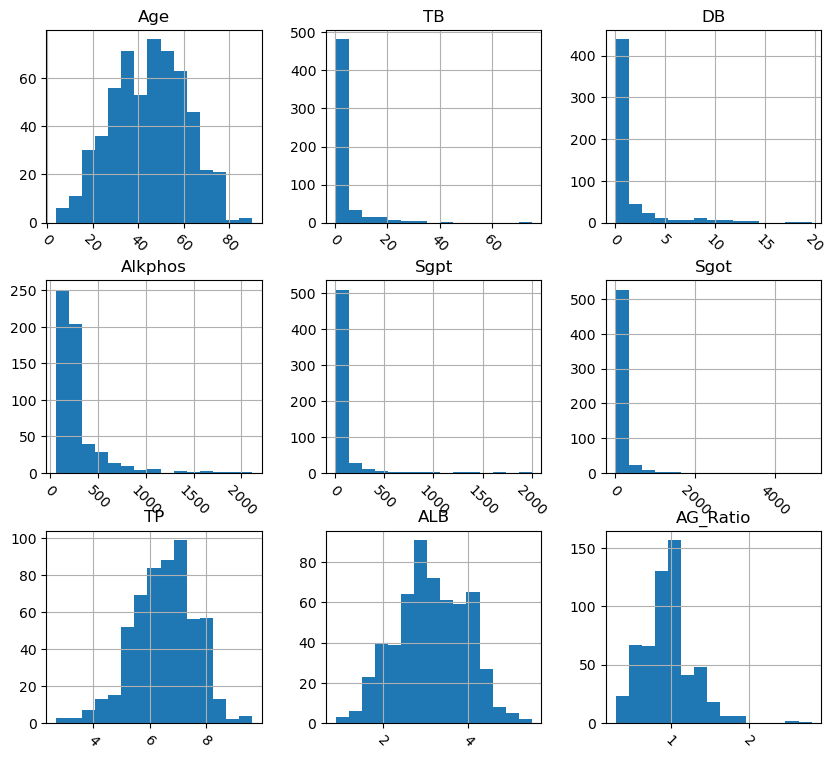

In [17]:
# Plot histogram grid
features_histogram.hist(figsize=(10,9), xrot=-45, bins=15) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

<font color = "blue"> An example to remove outliner "Sgot"

<Axes: xlabel='Sgot', ylabel='Density'>

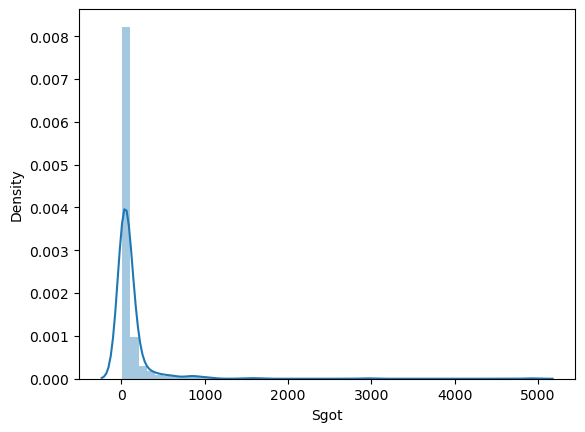

In [18]:
sns.distplot(initial_df['Sgot'])

<Axes: >

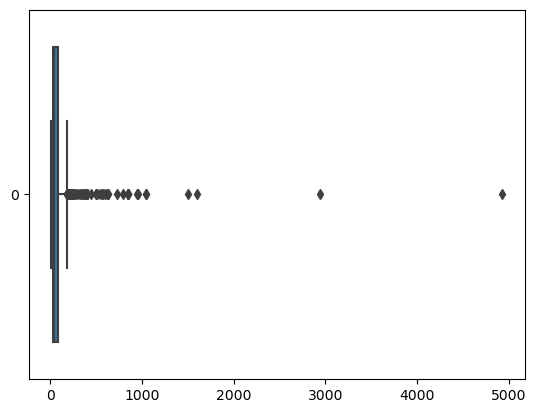

In [19]:
sns.boxplot(initial_df.Sgot, orient='h')

In [20]:
#initial_df.TB.sort_values(ascending=False).head()
#initial_df.DB.sort_values(ascending=False).head()
#initial_df.Alkphos.sort_values(ascending=False).head()
#initial_df.Sgpt.sort_values(ascending=False).head()
initial_df.Sgot.sort_values(ascending=False).head()              # sort in descending order
#initial_df.AG_Ratio.sort_values(ascending=False).head()

134    4929
116    2946
117    1600
206    1500
118    1050
Name: Sgot, dtype: int64

In [21]:
#Remove outliners in TB, DB, Alkphos, Sgpt and Sgot columns.
initial_df = initial_df[initial_df.TB <=70 ]
initial_df = initial_df[initial_df.DB <=17.0 ]
initial_df = initial_df[initial_df.Alkphos <=1700 ]
initial_df = initial_df[initial_df.Sgpt <=1900 ]
initial_df = initial_df[initial_df.Sgot <=3000 ]
initial_df = initial_df[initial_df.AG_Ratio <=2.0 ]
initial_df.shape

(553, 11)

In [22]:
initial_df.corr()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Liver_Disease
Age,1.000000,-0.067072,0.037126,0.048081,0.065373,-0.100109,-0.070037,-0.199515,-0.270669,-0.214096,0.135699
Gender,-0.067072,1.000000,-0.067126,-0.078979,0.026681,-0.077493,-0.089638,0.088824,0.085768,0.017396,-0.075281
TB,0.037126,-0.067126,1.000000,0.975993,0.295232,0.273785,0.381139,-0.027582,-0.245058,-0.310572,0.241329
DB,0.048081,-0.078979,0.975993,1.000000,0.301730,0.259352,0.356325,-0.024643,-0.240293,-0.311973,0.252482
Alkphos,0.065373,0.026681,0.295232,0.301730,1.000000,0.131513,0.148598,-0.045527,-0.176350,-0.267514,0.186877
Sgpt,-0.100109,-0.077493,0.273785,0.259352,0.131513,1.000000,0.836369,-0.031609,-0.023170,-0.009451,0.169088
Sgot,-0.070037,-0.089638,0.381139,0.356325,0.148598,0.836369,1.000000,-0.040539,-0.102279,-0.098949,0.206208
TP,-0.199515,0.088824,-0.027582,-0.024643,-0.045527,-0.031609,-0.040539,1.000000,0.797043,0.255180,-0.039351
ALB,-0.270669,0.085768,-0.245058,-0.240293,-0.176350,-0.023170,-0.102279,0.797043,1.000000,0.746257,-0.162555
AG_Ratio,-0.214096,0.017396,-0.310572,-0.311973,-0.267514,-0.009451,-0.098949,0.255180,0.746257,1.000000,-0.199968


<Axes: >

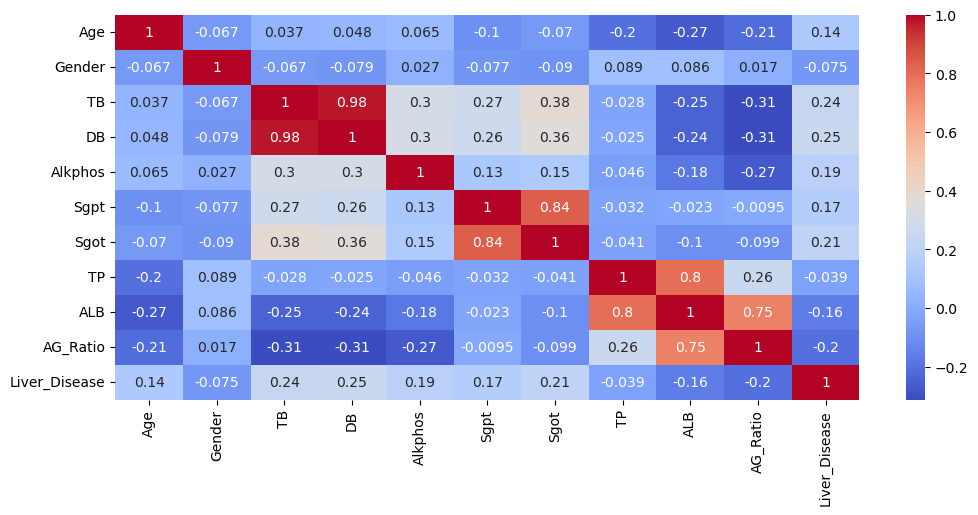

In [23]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(12,5))
sns.heatmap(initial_df.corr(), annot=True, cmap='coolwarm')

<font color = 'blue' >Multicollinearity between : <br>
<font color = 'blue' > - 'TB' and 'DB' is 0.98.   <br>
<font color = 'blue' > - 'Sgpt' and 'Sgot' is 0.84.<br>
<font color = 'blue' > - 'TP' and 'Albumin' is 0.80.<br>
<font color = 'blue' > - 'ALB' and 'AG_Ratio' is 0.75.<br>

 <font color = 'blue'> Define the features and labels, drop DB.

In [24]:
#features = initial_df[["Age", "Gender", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G_Ratio"]] 
features = initial_df[["Age", "Gender", "TB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "AG_Ratio"]] 
label = initial_df["Liver_Disease"]

# 5. Running the classifier

### Model-1 Random Forest



Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.57      0.48      0.52        27
           1       0.84      0.88      0.86        84

    accuracy                           0.78       111
   macro avg       0.70      0.68      0.69       111
weighted avg       0.77      0.78      0.78       111



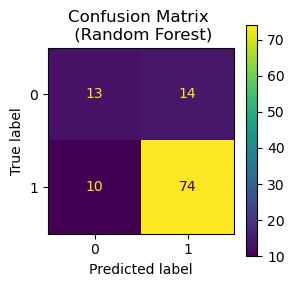

In [25]:
# Split the Data
X_train1, X_test1, y_train1, y_test1 = train_test_split(features, label, test_size=0.2, random_state = 3444)

# Initialize and train the machine learning model
RF = RandomForestClassifier()
RF_model = RF.fit(X_train1,y_train1)

# Predictions:
y_pred1 = RF_model.predict(X_test1)
#print(y_pred1)

# Predict Test set Proba results
y_proba1 = RF_model.predict_proba(X_test1)[:,1]
#print(y_proba1)

# Performance:
#print('Accuracy is', round(accuracy_score(y_test,y_pred),3))
#print("\n")

# Display Classification Report
print("\n")
print("Random Forest Classification Report")
RF_classification_report = classification_report(y_test1,y_pred1)
print(RF_classification_report)

# Save the accuracy, precision, recall and f1_scores.
accuracy_score_RF = round(accuracy_score(y_test1, y_pred1), 4)*100
precision_score_RF = round(precision_score(y_test1, y_pred1), 4)*100
recall_score_RF = round(recall_score(y_test1, y_pred1), 4)*100
f1_score_RF = round(f1_score(y_test1, y_pred1), 4)*100

# Confusion Matrix
random_forest_confusion_matrix = confusion_matrix(y_test1, y_pred1)
cmd_RF=ConfusionMatrixDisplay(random_forest_confusion_matrix, display_labels = [0,1])
fig, ax = plt.subplots(figsize=(3,3))
plt.title('Confusion Matrix \n (Random Forest)')
cmd_RF.plot(ax=ax)

### Model 2 - K Nearest Neigbour



K Nearest Neigbour Classification Report
              precision    recall  f1-score   support

           0       0.65      0.48      0.55        27
           1       0.85      0.92      0.88        84

    accuracy                           0.81       111
   macro avg       0.75      0.70      0.72       111
weighted avg       0.80      0.81      0.80       111



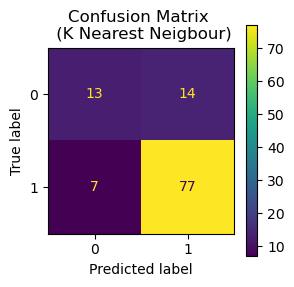

In [26]:
# Splitting the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, label, test_size = 0.2, random_state=3444)

# Training the KNN classifier
KNN = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
KNN_model = KNN.fit(X_train2, y_train2)

# Predicting on the test set
y_pred2 = KNN.predict(X_test2)

# Predict Test set Proba results
y_proba2 = KNN_model.predict_proba(X_test2)[:,1]
#print(y_proba2)

# Display Classification Report
print("\n")
print("K Nearest Neigbour Classification Report")
KNN_classification_report = classification_report(y_test2,y_pred2)
print(KNN_classification_report)

# Save the accuracy, precision, recall and f1_scores.
accuracy_score_KNN = round(accuracy_score(y_test2, y_pred2), 4)*100
precision_score_KNN = round(precision_score(y_test2, y_pred2), 4)*100
recall_score_KNN = round(recall_score(y_test2, y_pred2), 4)*100
f1_score_KNN = round(f1_score(y_test2, y_pred2), 4)*100

# Confusion Matrix
k_nearest_neigbour_confusion_matrix = confusion_matrix(y_test2, y_pred2)
cmd_KNN=ConfusionMatrixDisplay(k_nearest_neigbour_confusion_matrix, display_labels = [0,1])
fig, ax = plt.subplots(figsize=(3,3))
plt.title('Confusion Matrix \n (K Nearest Neigbour)')
cmd_KNN.plot(ax=ax)

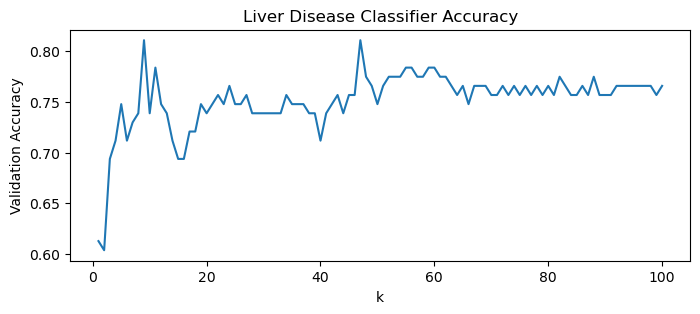

In [27]:
accuracies = []
for k in range(1,101):
    KNN= KNeighborsClassifier(n_neighbors = k)         # n_neighbors = k
    KNN.fit(X_train2, y_train2)
    #print(KNN.score(X_test2,y_test2))
    accuracies.append(KNN.score(X_test2,y_test2))

k_list = [i for i in range(1,101)]
#print(k_list)

fig = plt.figure(figsize=(8,3))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Liver Disease Classifier Accuracy")
plt.show()

<font color = "blue"> Note: A low k value often leads to overfitting and a large k value often leads to underfitting.

### Model 3 - Logistic Regression



Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.57      0.30      0.39        27
           1       0.80      0.93      0.86        84

    accuracy                           0.77       111
   macro avg       0.69      0.61      0.63       111
weighted avg       0.75      0.77      0.75       111



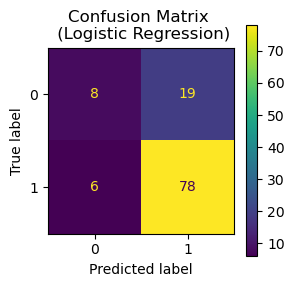

In [28]:
# Perform train, test, split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state = 3444)

# Normalize the Data : scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#print(pd.DataFrame(X_train, columns=initial_df.columns[:-1]))

# Create and train the model
LR = LogisticRegression(max_iter = 100)
LR_model = LR.fit(X_train, y_train)

# Analyze the coefficients (which feature is most important in predicting)
#print(LR.coef_)

# Predictions:
y_pred = LR_model.predict(X_test)
#print(y_pred)

# Predict Test set Proba results
y_proba = LR_model.predict_proba(X_test)[:,1]
#print(y_proba)

# Display Classification Report
print("\n")
print("Logistic Regression Classification Report")
LR_classification_report = classification_report(y_test,y_pred)
print(LR_classification_report)

# Save the accuracy, precision, recall and f1_scores.
accuracy_score_LR = round(accuracy_score(y_test, y_pred), 4)*100
precision_score_LR = round(precision_score(y_test, y_pred), 4)*100
recall_score_LR = round(recall_score(y_test, y_pred), 4)*100
f1_score_LR = round(f1_score(y_test, y_pred), 4)*100

# Confusion Matrix
logistic_regression_confusion_matrix = confusion_matrix(y_test, y_pred)
cmd_LR=ConfusionMatrixDisplay(logistic_regression_confusion_matrix, display_labels = [0,1])
fig, ax = plt.subplots(figsize=(3,3))
plt.title('Confusion Matrix \n (Logistic Regression)')
cmd_LR.plot(ax=ax)

In [29]:
compare_df = pd.DataFrame({"Actual_Output": y_test, 
                           "Predicted_Output": y_pred,
                            "Predict_Proba": y_proba})
#compare_df.sort_values(by=['Predict_Proba'], inplace=True, ascending=False)                    #sort data function
compare_df[:5]

,Actual_Output,Predicted_Output,Predict_Proba
280,0,1,0.533702
227,0,1,0.654198
169,1,1,0.734370
215,0,1,0.564876
268,1,0,0.314795


In [30]:
# List out the first twenty or less missed predictions
compared_bool = compare_df['Actual_Output'] != compare_df['Predicted_Output']


df_missed = compare_df[compared_bool]
df_missed.sort_values(by=['Actual_Output', 'Predict_Proba'], inplace=True, ascending=False) 
df_missed.loc[(df_missed['Actual_Output']==1)]

,Actual_Output,Predicted_Output,Predict_Proba
462,1,0,0.492325
345,1,0,0.490269
247,1,0,0.481273
306,1,0,0.426749
80,1,0,0.396334
268,1,0,0.314795


 # 6. Evaluate models

### Classification Report

In [31]:
compare_score = pd.DataFrame()
compare_score=compare_score.reset_index(drop=True)

compare_score[' '] = ["Accuracy", "Precision", "Recall", "F1 score"]
compare_score.set_index(' ')
compare_score['Logistic Regression'] = accuracy_score_LR, precision_score_LR, recall_score_LR, f1_score_LR
compare_score['Random Forest'] = [accuracy_score_RF, precision_score_RF, recall_score_RF, f1_score_RF]
compare_score['K Nearest Neigbour'] = [accuracy_score_KNN, precision_score_KNN, recall_score_KNN, f1_score_KNN]
#compare_score['Model4'] =[0,0,0,0]
compare_score

,,Logistic Regression,Random Forest,K Nearest Neigbour
0,Accuracy,77.48,78.38,81.08
1,Precision,80.41,84.09,84.62
2,Recall,92.86,88.10,91.67
3,F1 score,86.19,86.05,88.00


### ROC - Receiver Operating Characteristic

<font color = 'blue'> A graph showing the performance of a classification models at all classification thresholds.

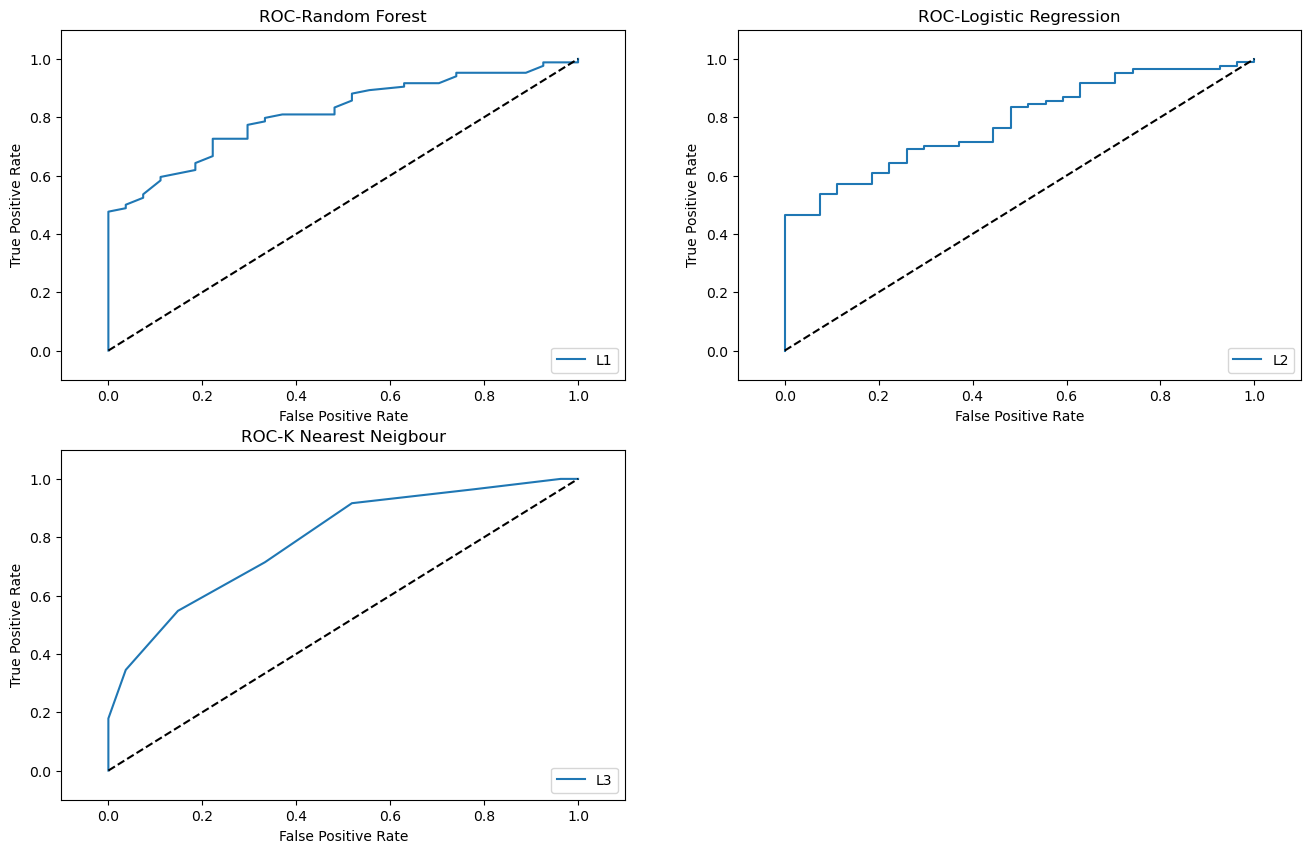

In [32]:
# instantiating the roc_cruve
fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_proba1)     # Random Forest
fpr, tpr, thresholds = roc_curve(y_test, y_proba)          # Logistic Regression
fpr2, tpr2, thresholds2 = roc_curve(y_test2, y_proba2)          # Logistic Regression

fig = plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(fpr1, tpr1, label='L1')     # Plot ROC curve
plt.legend(loc='lower right')        # Position of legend
plt.plot([0,1],[0,1],'k--')          # Diagonal 45 degree line
plt.title('ROC-Random Forest')
plt.xlim([-0.1,1.1])                 # Axes limits and labels
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(2,2,2)
plt.plot(fpr, tpr, label='L2')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
#plt.plot([0, 1], [0, 1], color = 'g')
plt.title('ROC-Logistic Regression')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.subplot(2,2,3)
plt.plot(fpr2, tpr2, label='L3')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
#plt.plot([0, 1], [0, 1], color = 'g')
plt.title('ROC-K Nearest Neigbour')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

### AUC - Area Under ROC Curve

<font color = "blue"> AUC measures the entire two-dimensional area underneath the entire ROC curve.

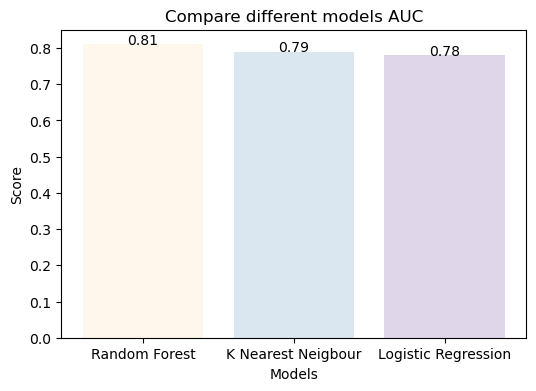

In [33]:
RF_AUC = round(roc_auc_score(y_test1, y_proba1), 2)
KNN_AUC = round(roc_auc_score(y_test2, y_proba2), 2)
LR_AUC = round(roc_auc_score(y_test, y_proba), 2)

plt.figure(figsize=(6,4))
plt.bar("Random Forest", RF_AUC , color=["blanchedalmond"], alpha = 0.40)
plt.bar("K Nearest Neigbour", KNN_AUC , color=["steelblue"], alpha = 0.20)
plt.bar("Logistic Regression", LR_AUC , color=["rebeccapurple"], alpha = 0.20)

plt.text("Random Forest", RF_AUC, RF_AUC, ha = 'center')
plt.text("K Nearest Neigbour", KNN_AUC, KNN_AUC, ha = 'center')
plt.text("Logistic Regression", LR_AUC, LR_AUC, ha = 'center')

plt.title("Compare different models AUC")
plt.xlabel("Models")
plt.ylabel('Score')
plt.show()

  # 7. Insights

 - Due to the small size of the dataset (553 observations) and its mild class imbalance, with the minority class (class 0) accounting for approximately less than 30%, the model performances are expected to vary. Furthermore, the number of positive records is three times higher than the number of negative records.
 <br>

 - The classification report shows accuracy scores ranging from approximately 77% to 81% for all three models, with the highest score achieved by KNN. However, since our goal is to capture all positive cases in this scenario, we should prioritize the Recall score when selecting a model for prediction. According to the Recall score, Logistic Regression performs the best with an accuracy of 92.86%.
 <br>

- When examining the ROC graphs, reducing the thresholds value will allows us to capture all False Negatives (FN). The AUC score indicates that the Random Forest model is the best model for prediction. However, since our focus is on capturing all positive cases rather than accurately ranking predictions, the AUC score is not a useful metric for this specific prediction ranking.
<br>

   # 8. Bonus Round

In [37]:
    # [Bonus-round Prediction]
Jack = np.array([36, 0, 1.50, 72, 145, 65, 7.4, 4.5, 1.55])       # CK's Liver Profile Test
Jack = Jack.reshape(1, -1)

    # Scale sample person features
Jack_scaled = scaler.transform(Jack)

    # Make predictions!
y_pred_jack = LR_model.predict(Jack_scaled)
y_pred1_jack = RF_model.predict(Jack)
y_pred2_jack = KNN_model.predict(Jack)
print("Logistic Regression model predict: ", y_pred_jack)
print("Random Forest model predict:       ", y_pred1_jack)
print("K Nearest Neigbour model predict:  ", y_pred2_jack)

print("                                                   ***[0] Without Liver Disease")
print("                                                      [1] With Liver Disease")

Logistic Regression model predict:  [1]
Random Forest model predict:        [1]
K Nearest Neigbour model predict:   [1]
                                                   ***[0] Without Liver Disease
                                                      [1] With Liver Disease


<font color = "blue"> And all **three models predicted correctly** as Jack do have Liver Disease (NAFLD, aka Non-alcoholic fatty liver disease).

## End of Presentation